In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/1a/b4ab4b8f8b3a41fade4899fd00b5b2d2dad0981f3e1bb10df4c522975fd7/tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/0c/2a/d3ff6091406bc2207e0adb832ebd15e40ac685811c7e2e3b432bfd969b71/scikit_learn-1.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/92/1a/cd3e0c90d1a763ad90073e13b189b4702f11becf4e71dbbad70a7a149811/matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.many

In [2]:
notebookdir=os.getcwd()
image_folder = "C:\\Users\\Szirm\\miniconda3\\Scripts\\Homework\\Images"
folder_path=r"C:\Users\Szirm\Downloads\archive\images\gob64"
file_path = 'artbreederGoblin.csv'

In [3]:
file_names = os.listdir(folder_path)
print(f"Number of filenames: {len(file_names)}")
id_column="idArtBreeder"
label_column = 'gender'
df = pd.read_csv(file_path)
ids=df[id_column].apply(lambda x: os.path.join(folder_path, x + '-64.jpg'))
# Assuming you have a list of file paths and corresponding labels
# Get a list of all files in the image folder



print(f"Number of filenames: {len(file_names)}")


# List of file paths to your images
labels =  df[label_column] # List of corresponding labels (1 for male, 5 for female others in between)

print(f"Number of Labels: {len(labels)}")
labels = to_categorical(labels-1, num_classes=5)

Number of filenames: 750
Number of filenames: 750
Number of Labels: 750


In [4]:

# Shuffle the data
ids, labels = shuffle(ids, labels, random_state=42)

# Split the dataset into training and testing sets
train_files, test_files, train_labels, test_labels = train_test_split(
    ids, labels, test_size=0.2, random_state=42
)


In [5]:
# Data preprocessing function
def preprocess_image(file_path, label):
    # Load and preprocess the image
    img = tf.io.read_file(file_path)
    img = tf.image.decode_image(img, channels=3)
    #img = tf.image.resize(img, (224, 224))  # Adjust the size as needed
    img = tf.cast(img, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return img, label


In [6]:
# Create TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_files, train_labels))
train_dataset = train_dataset.map(preprocess_image)
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size=32)

test_dataset = tf.data.Dataset.from_tensor_slices((test_files, test_labels))
test_dataset = test_dataset.map(preprocess_image)
test_dataset = test_dataset.batch(batch_size=32)


In [7]:
# Define the model
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(Dense(128, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))



# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model. summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)       

In [8]:
# Train the model
model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10


19/19 [==============================] - 3s 72ms/step - loss: 0.4847 - accuracy: 0.4033 - val_loss: 0.4447 - val_accuracy: 0.4133
Epoch 2/10
19/19 [==============================] - 1s 61ms/step - loss: 0.4347 - accuracy: 0.4717 - val_loss: 0.4212 - val_accuracy: 0.5200
Epoch 3/10
19/19 [==============================] - 2s 73ms/step - loss: 0.4101 - accuracy: 0.5433 - val_loss: 0.3680 - val_accuracy: 0.6400
Epoch 4/10
19/19 [==============================] - 2s 71ms/step - loss: 0.3692 - accuracy: 0.6033 - val_loss: 0.3493 - val_accuracy: 0.6600
Epoch 5/10
19/19 [==============================] - 2s 67ms/step - loss: 0.3218 - accuracy: 0.6567 - val_loss: 0.3382 - val_accuracy: 0.6333
Epoch 6/10
19/19 [==============================] - 1s 61ms/step - loss: 0.3003 - accuracy: 0.6733 - val_loss: 0.2948 - val_accuracy: 0.7133
Epoch 7/10
19/19 [==============================] - 1s 66ms/step - loss: 0.2771 - accuracy: 0.7200 - val_loss: 0.3267 - val_accuracy: 0.6533
Epoch 8/10


In [9]:
# predict probabilities for test set
predictions_raw = model.predict(test_dataset)
# predict crisp classes for test set
predicted_classes = np.argmax(predictions_raw, axis=1)
# reduce to 1d array
predictions_raw
print(predicted_classes)
print(predictions_raw)

5/5 [==============================] - 0s 19ms/step
[0 0 4 4 0 0 4 0 0 4 4 2 0 0 4 2 0 3 0 2 2 4 2 4 1 0 0 4 0 0 4 1 2 0 4 0 4
 4 4 2 4 4 4 0 0 3 4 4 3 0 0 4 3 2 1 0 0 4 0 2 0 2 0 0 1 4 4 4 4 4 0 0 4 0
 2 4 4 0 4 4 0 3 4 0 0 3 1 2 0 0 0 4 0 4 3 2 0 0 4 3 2 4 3 3 2 4 4 4 4 0 4
 0 4 0 2 1 0 0 0 3 0 0 3 4 2 0 0 0 3 0 4 4 4 4 0 4 0 4 0 1 3 0 4 2 3 0 0 4
 0 4]
[[7.87752390e-01 1.83085091e-02 1.93428949e-01 1.87945348e-04
  3.22179316e-04]
 [8.42011094e-01 7.41100237e-02 6.27316535e-02 1.38179827e-02
  7.32922927e-03]
 [5.15638525e-03 4.55012135e-02 1.91093057e-01 1.72803238e-01
  5.85446060e-01]
 [2.81162374e-03 2.26931693e-03 2.02596840e-02 1.18585102e-01
  8.56074333e-01]
 [9.90656435e-01 7.73992762e-03 5.43608272e-04 1.02645287e-03
  3.36525809e-05]
 [8.64661634e-01 9.18716416e-02 2.38963589e-02 1.77337509e-02
  1.83664891e-03]
 [1.90405559e-03 1.13085681e-03 4.86272387e-03 2.71627959e-03
  9.89386082e-01]
 [9.85495865e-01 9.39394068e-03 1.27210619e-03 3.60056944e-03
  2.37520901e-04]
 [

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc}')


5/5 [==============================] - 0s 23ms/step - loss: 0.2815 - accuracy: 0.6867
Test accuracy: 0.6866666674613953


In [11]:
test_labels = np.argmax(test_labels+1, axis=1)

In [12]:
print(test_labels)
print(predicted_classes)

[0 0 4 4 0 0 4 0 0 2 4 2 0 0 4 4 0 2 2 3 4 4 1 4 3 0 3 4 0 0 4 1 4 4 3 0 4
 4 4 3 4 3 4 0 0 3 4 4 3 0 0 2 0 4 3 1 0 3 1 2 0 1 1 2 1 4 4 4 4 4 0 2 4 0
 1 4 4 0 4 4 0 4 4 4 0 4 0 2 2 1 0 4 1 4 3 4 0 0 4 4 4 4 1 4 0 4 4 4 4 0 4
 0 4 0 4 1 0 0 0 4 0 0 4 4 0 0 1 0 3 0 4 4 4 4 0 4 0 4 0 3 3 0 4 1 3 1 0 4
 0 4]
[0 0 4 4 0 0 4 0 0 4 4 2 0 0 4 2 0 3 0 2 2 4 2 4 1 0 0 4 0 0 4 1 2 0 4 0 4
 4 4 2 4 4 4 0 0 3 4 4 3 0 0 4 3 2 1 0 0 4 0 2 0 2 0 0 1 4 4 4 4 4 0 0 4 0
 2 4 4 0 4 4 0 3 4 0 0 3 1 2 0 0 0 4 0 4 3 2 0 0 4 3 2 4 3 3 2 4 4 4 4 0 4
 0 4 0 2 1 0 0 0 3 0 0 3 4 2 0 0 0 3 0 4 4 4 4 0 4 0 4 0 1 3 0 4 2 3 0 0 4
 0 4]


In [13]:
precision = precision_score(test_labels, predicted_classes, average='weighted')
recall = recall_score(test_labels, predicted_classes, average='weighted')
f1 = f1_score(test_labels, predicted_classes, average='weighted')

In [14]:
print(precision)
print(recall)
print(f1)

0.7103166182476527
0.6866666666666666
0.6880375323672245


In [15]:
kappa = cohen_kappa_score(test_labels, predicted_classes)
print(f'Cohen\'s Kappa: {kappa}')

Cohen's Kappa: 0.5588787385809035


In [16]:
cm = confusion_matrix(test_labels, predicted_classes)
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[44  1  2  1  0]
 [ 7  3  4  1  0]
 [ 4  0  3  1  2]
 [ 1  3  2  6  3]
 [ 2  0  7  6 47]]


In [17]:
y_true_binarized = label_binarize(test_labels, classes=np.unique(test_labels))

In [18]:
roc_auc_scores = []

In [19]:
for i in range(np.max(test_labels) + 1):  # Assuming class labels start from 0
    roc_auc_scores.append(roc_auc_score(y_true_binarized[:, i], predictions_raw[:, i]))

In [20]:
print(f'ROC AUC Scores for Each Class: {roc_auc_scores}')

ROC AUC Scores for Each Class: [0.957720588235294, 0.8716049382716049, 0.7192857142857143, 0.8538271604938272, 0.9492302052785924]


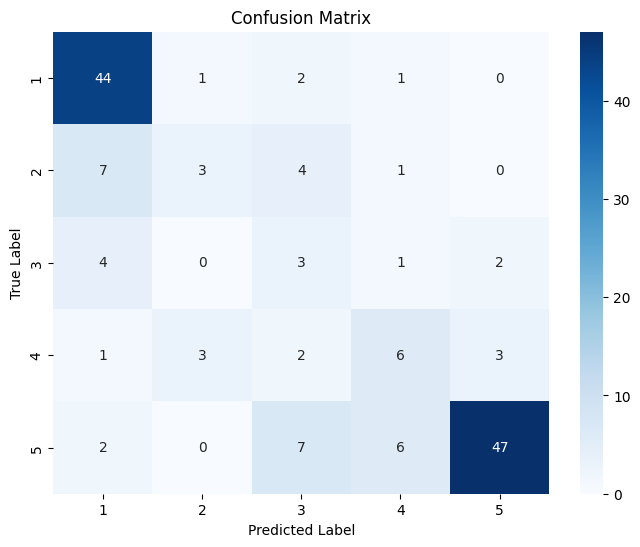

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()